### Welcome to this data analysis project that analyzes the market value of most expensive footballers in 2021.

#### You can also follow me on LinkedIn for posts: https://bit.ly/479O4BC 

#### The project was conducted to gain insghts into the following questions
1. How do players perform in terms of goals, assists, and other metrics?
2. What are the most common player positions in the dataset?
3. What is the distribution of player ages in the dataset?
4. What is the distribution of player market values?
5. What are the nationalities of players in the dataset?
6. Which clubs are most represented in the dataset?
7. How many matches have players participated in on average?
8. What is the distribution of goals scored by players?
9. What is the distribution of assists provided by players?
10. How many yellow and red cards have players received on average?
11. How many own goals have players scored on average?

The data set used for this project is publicly available on kaggle.com
data sourced: https://www.kaggle.com/datasets/sanjeetsinghnaik/most-expensive-footballers-2021

#### Importing Libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Load the dataset

In [152]:
players = pd.read_csv('players.csv')
players.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


#### Data Preprocessing

In [153]:
players.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [154]:
# Renaming column names for consistency

players = players.rename(columns={'Markey Value In Millions(£)': 'Market_value', 'Own Goals': 'Own_goals',
                                 'Yellow Cards': 'Yellow_cards', 'Second Yellow Cards': 'Second_yellow_cards',
                                 'Red Cards': 'Red_cards', 'Number Of Substitute In': 'Substitute_in',
                                 'Number Of Substitute Out': 'Substitute_out'})

In [155]:
players.head()

,Unnamed: 0,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [158]:
#dropping unnamed column
players.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [159]:
players.head()

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out
0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [160]:
players.shape

(500, 15)

In [161]:
players.index

RangeIndex(start=0, stop=500, step=1)

In [162]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 500 non-null    object 
 1   Position             500 non-null    object 
 2   Age                  500 non-null    int64  
 3   Market_value         500 non-null    float64
 4   Country              500 non-null    object 
 5   Club                 500 non-null    object 
 6   Matches              500 non-null    int64  
 7   Goals                500 non-null    int64  
 8   Own_goals            500 non-null    int64  
 9   Assists              500 non-null    int64  
 10  Yellow_cards         500 non-null    int64  
 11  Second_yellow_cards  500 non-null    int64  
 12  Red_cards            500 non-null    int64  
 13  Substitute_in        500 non-null    int64  
 14  Substitute_out       500 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memo

In [163]:
players.dtypes

Name                    object
Position                object
Age                      int64
Market_value           float64
Country                 object
Club                    object
Matches                  int64
Goals                    int64
Own_goals                int64
Assists                  int64
Yellow_cards             int64
Second_yellow_cards      int64
Red_cards                int64
Substitute_in            int64
Substitute_out           int64
dtype: object

In [164]:
# convert market value to int
players['Market_value'] = players['Market_value'].astype(int)
players['Market_value'].dtypes

dtype('int32')

In [165]:
players.isna().sum()

Name                   0
Position               0
Age                    0
Market_value           0
Country                0
Club                   0
Matches                0
Goals                  0
Own_goals              0
Assists                0
Yellow_cards           0
Second_yellow_cards    0
Red_cards              0
Substitute_in          0
Substitute_out         0
dtype: int64

In [166]:
players.isnull().sum()

Name                   0
Position               0
Age                    0
Market_value           0
Country                0
Club                   0
Matches                0
Goals                  0
Own_goals              0
Assists                0
Yellow_cards           0
Second_yellow_cards    0
Red_cards              0
Substitute_in          0
Substitute_out         0
dtype: int64

In [167]:
players.describe()

,Age,Market_value,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24.968000,31.250000,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,3.165916,17.637848,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,16.000000,16.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,19.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,25.000000,25.000000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,27.000000,36.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,36.000000,144.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


In [168]:
# check for uniqueness in country
players['Country'].unique()

array(['France', 'Norway', 'England', 'Egypt', 'Belgium', 'Brazil',
       'Netherlands', 'Portugal', 'Germany', 'Senegal', 'Korea, South',
       'Spain', 'Argentina', 'Canada', 'Morocco', 'Italy', 'Serbia',
       'Slovenia', 'Uruguay', 'Scotland', 'Nigeria', 'Slovakia', 'Poland',
       "Cote d'Ivoire", 'Austria', 'United States', 'Turkey', 'Mexico',
       'Croatia', 'Czech Republic', 'Algeria', 'Burkina Faso', 'Sweden',
       'Ghana', 'Denmark', 'Jamaica', 'Colombia', 'Guinea', 'Switzerland',
       'Ukraine', 'Russia', 'DR Congo', 'Hungary', 'Mali', 'Japan',
       'Cameroon', 'Iran', 'Montenegro', 'Gabon', 'Albania', 'Zambia',
       'The Gambia', 'Israel', 'Georgia', 'Venezuela', 'Wales', 'Peru'],
      dtype=object)

In [170]:
players['Country'].nunique()

57

In [171]:
players.columns

Index(['Name', 'Position', 'Age', 'Market_value', 'Country', 'Club', 'Matches',
       'Goals', 'Own_goals', 'Assists', 'Yellow_cards', 'Second_yellow_cards',
       'Red_cards', 'Substitute_in', 'Substitute_out'],
      dtype='object')

In [172]:
players['Club'].unique()

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Manchester United', 'FC Barcelona', 'Bayern Munich',
       'Inter Milan', 'Atlético de Madrid', 'West Ham United',
       'Real Sociedad', 'Juventus FC', 'SS Lazio', 'Real Madrid',
       'Bayer 04 Leverkusen', 'Arsenal FC', 'Sevilla FC', 'SSC Napoli',
       'Leicester City', 'Everton FC', 'AC Milan', 'Villarreal CF',
       'ACF Fiorentina', 'RB Leipzig', 'AS Roma', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Valencia CF', 'Leeds United',
       'LOSC Lille', 'Aston Villa', 'Olympique Lyon', 'OGC Nice',
       'AS Monaco', 'Atalanta BC', 'US Sassuolo', 'Torino FC',
       'Ajax Amsterdam', 'Brentford FC', 'Southampton FC',
       'Newcastle United', 'VfL Wolfsburg', 'FC Porto',
       'Olympique Marseille', 'Eintracht Frankfurt',
       'Borussia Mönchengladbach', 'Watford FC', 'Stade Rennais FC',
       'Clube de Regatas do Flamengo', 'VfB

In [173]:
players['Club'].nunique()

81

In [174]:
players['Position'].unique()

array(['Centre-Forward', 'Left Winger', 'Right Winger',
       'Attacking Midfield', 'Central Midfield', 'Defensive Midfield',
       'Right-Back', 'Centre-Back', 'Second Striker', 'Left-Back',
       'Goalkeeper', 'Left Midfield', 'Right Midfield'], dtype=object)

In [175]:
players['Position'].nunique()

13

### Insights
- They are 500 records and 15 original columns in the dataset with columns subjects to further modifications based on
    the questions
- The mean age of players in the analysis is approximately 25 years.
- The mean market value for all players across all clubs is 31.25
- They are 12 matches played for all players on average with an avearge of 2 goals scored per match and at least one assist
- They is an average of 2 players substituted in per game
- The oldest player is 36 years
- All players featured in the competiton were from 52 different nationalities
- A total of 81 clubs participated in the competition

#### Data Modelling

#### 1. How do players perform in terms of goals, assists, and other metrics per game?

In [176]:
players.columns

Index(['Name', 'Position', 'Age', 'Market_value', 'Country', 'Club', 'Matches',
       'Goals', 'Own_goals', 'Assists', 'Yellow_cards', 'Second_yellow_cards',
       'Red_cards', 'Substitute_in', 'Substitute_out'],
      dtype='object')

In [177]:
# create new columns for goals, assists
players['Goals_per_game'] = (players['Goals']/players['Matches']).round(2)
players['Assists_per_game'] = (players['Assists']/players['Matches']).round(2)
players.head()

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,Goals_per_game,Assists_per_game
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,0.44,0.69
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,1.30,0.40
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,0.44,0.12
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,0.13,0.20
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,1.00,0.40


In [178]:
df_goal_ass = players[['Name', 'Goals','Assists', 'Goals_per_game', 'Assists_per_game']]
df_goal_ass.head()

,Name,Goals,Assists,Goals_per_game,Assists_per_game
0,Kylian Mbappé,7,11,0.44,0.69
1,Erling Haaland,13,4,1.30,0.40
2,Harry Kane,7,2,0.44,0.12
3,Jack Grealish,2,3,0.13,0.20
4,Mohamed Salah,15,6,1.00,0.40


In [179]:
df_goal_ass.describe()

,Goals,Assists,Goals_per_game,Assists_per_game
count,500.000000,500.00000,493.000000,493.000000
mean,2.160000,1.51200,0.165497,0.113631
std,2.880102,1.85276,0.203065,0.127132
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.00000,0.110000,0.080000
75%,3.000000,2.00000,0.250000,0.180000
max,23.000000,12.00000,1.350000,0.690000


In [180]:
#Top scoring players
top_scoring_players = players.groupby('Name').Goals.sum().sort_values(ascending=False).head(20)
top_scoring_players

Name
Robert Lewandowski    23
Karim Adeyemi         15
Mohamed Salah         15
Julián Álvarez        15
Sébastien Haller      14
Karim Benzema         14
Erling Haaland        13
Paul Onuachu          12
Dušan Vlahovic        12
Christopher Nkunku    11
Luis Díaz             11
Ciro Immobile         11
Cristiano Ronaldo     10
Vinícius Júnior        9
Viktor Tsygankov       9
Victor Osimhen         9
Jonathan David         9
Pedro Gonçalves        9
Sardar Azmoun          9
Leroy Sané             8
Name: Goals, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Robert Lewandowski'),
  Text(1, 0, 'Karim Adeyemi'),
  Text(2, 0, 'Mohamed Salah'),
  Text(3, 0, 'Julián Álvarez'),
  Text(4, 0, 'Sébastien Haller'),
  Text(5, 0, 'Karim Benzema'),
  Text(6, 0, 'Erling Haaland'),
  Text(7, 0, 'Paul Onuachu'),
  Text(8, 0, 'Dušan Vlahovic'),
  Text(9, 0, 'Christopher Nkunku'),
  Text(10, 0, 'Luis Díaz'),
  Text(11, 0, 'Ciro Immobile'),
  Text(12, 0, 'Cristiano Ronaldo'),
  Text(13, 0, 'Vinícius Júnior'),
  Text(14, 0, 'Viktor Tsygankov'),
  Text(15, 0, 'Victor Osimhen'),
  Text(16, 0, 'Jonathan David'),
  Text(17, 0, 'Pedro Gonçalves'),
  Text(18, 0, 'Sardar Azmoun'),
  Text(19, 0, 'Leroy Sané')])

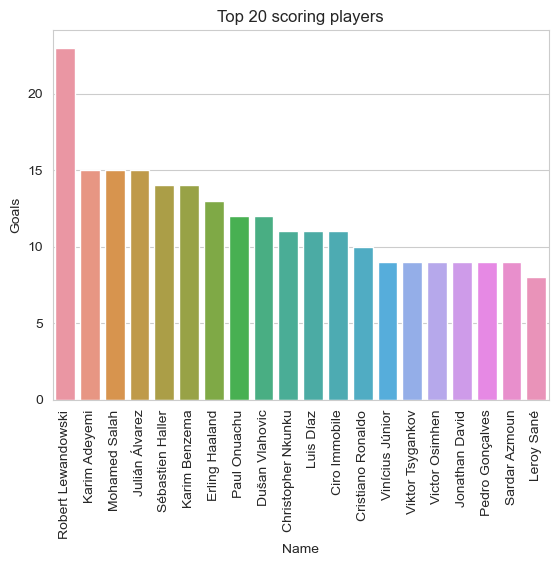

In [181]:
sns.barplot(data=players, x='Name', y='Goals', order=top_scoring_players.index)
plt.title('Top 20 scoring players')
plt.xticks(rotation=90)

In [182]:
# by assists
top_assist_players = players.groupby('Name').Assists.sum().sort_values(ascending=False).head(20)
top_assist_players

Name
Thomas Müller             12
Kylian Mbappé             11
Leroy Sané                10
Karim Benzema              8
Cody Gakpo                 8
Bruno Fernandes            8
Trent Alexander-Arnold     7
Vinícius Júnior            7
Christopher Nkunku         7
Sandro Tonali              7
Jude Bellingham            7
Paul Pogba                 7
Florian Wirtz              7
Nicolò Barella             6
Noa Lang                   6
Andrej Kramaric            6
Umar Sadiq                 6
Antony                     6
Mohamed Salah              6
Amine Gouiri               6
Name: Assists, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Thomas Müller'),
  Text(1, 0, 'Kylian Mbappé'),
  Text(2, 0, 'Leroy Sané'),
  Text(3, 0, 'Karim Benzema'),
  Text(4, 0, 'Cody Gakpo'),
  Text(5, 0, 'Bruno Fernandes'),
  Text(6, 0, 'Trent Alexander-Arnold'),
  Text(7, 0, 'Vinícius Júnior'),
  Text(8, 0, 'Christopher Nkunku'),
  Text(9, 0, 'Sandro Tonali'),
  Text(10, 0, 'Jude Bellingham'),
  Text(11, 0, 'Paul Pogba'),
  Text(12, 0, 'Florian Wirtz'),
  Text(13, 0, 'Nicolò Barella'),
  Text(14, 0, 'Noa Lang'),
  Text(15, 0, 'Andrej Kramaric'),
  Text(16, 0, 'Umar Sadiq'),
  Text(17, 0, 'Antony'),
  Text(18, 0, 'Mohamed Salah'),
  Text(19, 0, 'Amine Gouiri')])

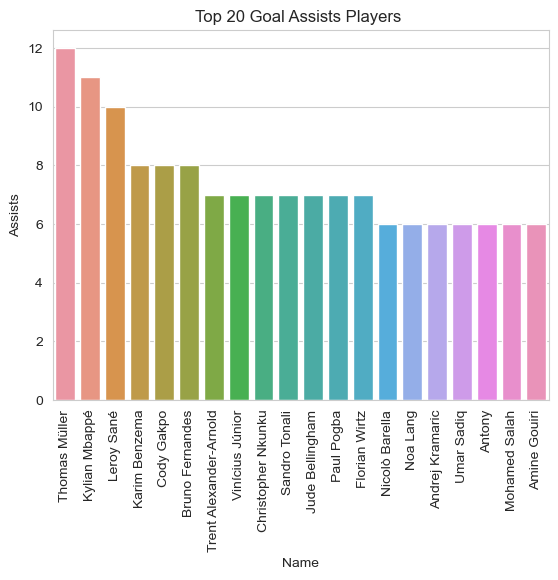

In [183]:
sns.barplot(data=players, x='Name', y='Assists', order=top_assist_players.index)
plt.title('Top 20 Goal Assists Players ')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Goals', ylabel='Assists'>

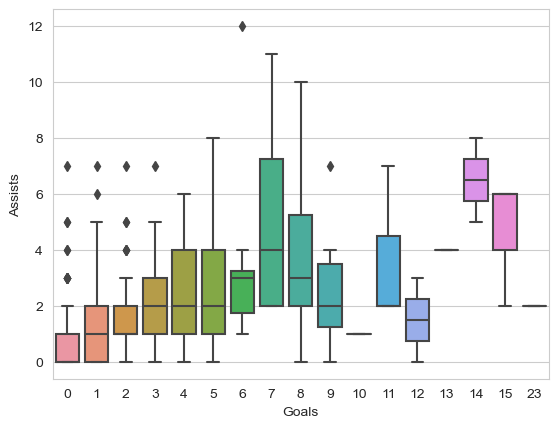

In [184]:
#Goals and Assists per game
sns.boxplot(data=df_goal_ass, x='Goals', y='Assists')

### Insights:
- Robert Lewandowski was the top goal scorer with 23 goals, followed by Karim Adeyemi, Mohamed Salah, and Julián Álvarez 
    with 15 goals each. Sébastien Haller and Karim Benzema also level up 14 goals each.
- Thomas Müller was the top goal assist with 12 goals, Kylian Mbappé (11 goals), Leroy Sané (10 goals), and Karim Benzema, 
    Cody Gakpo, Bruno Fernandes with 8 goals each.

#### 2. What are the most common player positions in the dataset?

In [185]:
players['Position'].unique()

array(['Centre-Forward', 'Left Winger', 'Right Winger',
       'Attacking Midfield', 'Central Midfield', 'Defensive Midfield',
       'Right-Back', 'Centre-Back', 'Second Striker', 'Left-Back',
       'Goalkeeper', 'Left Midfield', 'Right Midfield'], dtype=object)

In [186]:
x = players.Position.value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

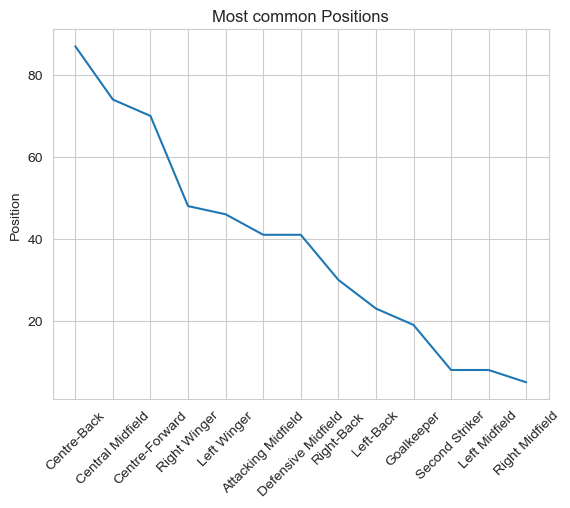

In [187]:
sns.lineplot(data=x)
plt.title('Most common Positions')
plt.xticks(rotation=45)

In [191]:
players.Position.value_counts().sort_values(ascending=False)

Centre-Back           87
Central Midfield      74
Centre-Forward        70
Right Winger          48
Left Winger           46
Attacking Midfield    41
Defensive Midfield    41
Right-Back            30
Left-Back             23
Goalkeeper            19
Second Striker         8
Left Midfield          8
Right Midfield         5
Name: Position, dtype: int64

#### 3. What is the distribution of player ages in the dataset?

Text(0.5, 1.0, 'Distribution of Player Ages')

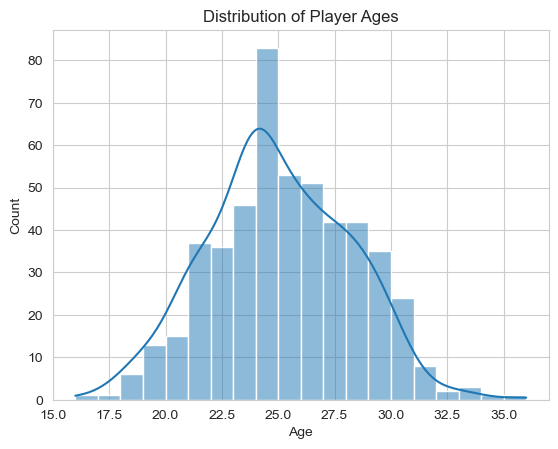

In [192]:
# Distribuution of players ages in the dataset
sns.histplot(data=players, x='Age', kde=True)
plt.title('Distribution of Player Ages')

- The histogram shows an average mean age of 25 years and a max age of 36 years.
- The youngest player(s) is 18 years old

#### 4. What is the distribution of player market values?

<AxesSubplot:xlabel='Market_value', ylabel='Count'>

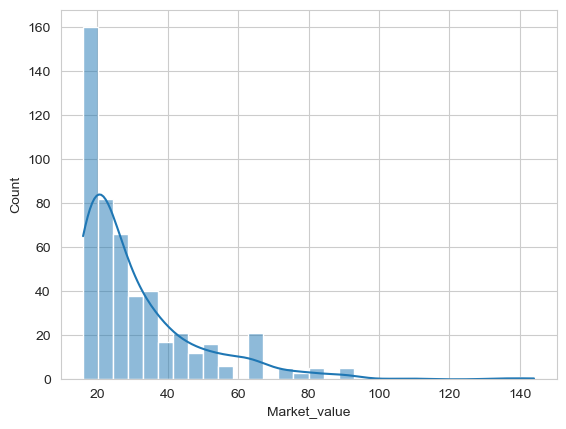

In [193]:
sns.histplot(data=players, x='Market_value', kde=True)

In [194]:
#Market value grouped by position
df = players.groupby('Position').Market_value.sum().sort_values(ascending=False)
df

Position
Centre-Back           2557
Central Midfield      2401
Centre-Forward        2348
Left Winger           1632
Right Winger          1447
Attacking Midfield    1324
Defensive Midfield    1263
Right-Back             777
Left-Back              697
Goalkeeper             582
Second Striker         279
Left Midfield          213
Right Midfield         105
Name: Market_value, dtype: int32

Text(0.5, 1.0, 'Line plot of Market Value by Position')

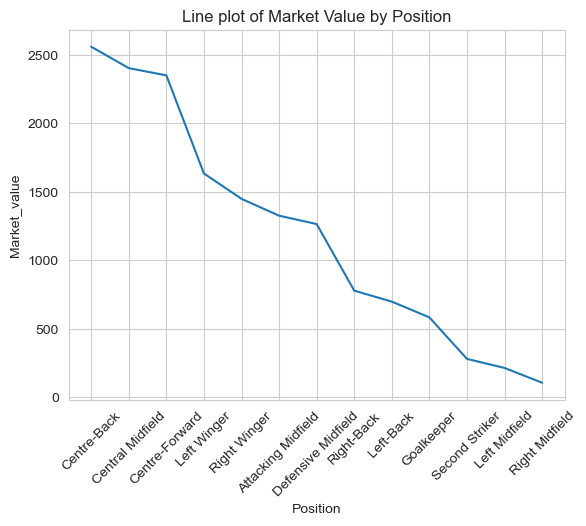

In [195]:
sns.lineplot(data=df)
plt.xticks(rotation=45)
plt.title('Line plot of Market Value by Position')

- Midfielders in combined positions have more market value than other players positions

#### 5. What are the nationalities of players in the dataset?

In [196]:
players['Country'].nunique()

57

In [198]:
players.Country.value_counts().head(15)

England          67
France           58
Spain            52
Brazil           41
Germany          29
Portugal         26
Italy            26
Argentina        22
Netherlands      17
Belgium          14
Uruguay          11
Cote d'Ivoire     8
Croatia           8
Denmark           7
Nigeria           7
Name: Country, dtype: int64

In [199]:
players.groupby('Country').Market_value.sum().sort_values(ascending=False).head(15)

Country
England          2227
France           1878
Spain            1556
Brazil           1263
Germany           999
Portugal          881
Italy             847
Argentina         645
Netherlands       565
Belgium           519
Uruguay           285
Cote d'Ivoire     216
Senegal           210
Croatia           204
Nigeria           198
Name: Market_value, dtype: int32

In [200]:
players.groupby('Country').Market_value.mean().sort_values(ascending=False).head(15)

Country
Egypt           90.000000
Korea, South    76.000000
Slovenia        63.000000
Norway          62.333333
Slovakia        54.000000
Canada          47.000000
Morocco         37.250000
Belgium         37.071429
Ghana           36.000000
Senegal         35.000000
Germany         34.448276
Portugal        33.884615
England         33.238806
Netherlands     33.235294
Serbia          33.200000
Name: Market_value, dtype: float64

- England top the countries with highest players in the competition. The top five countries with highest players 
    reperesntation include; 
    - England          67
    - France           58
    - Spain            52
    - Brazil           41
    - Germany          29
- These countries are also the most valuabe nations by market value cap

#### 6. Which clubs are most represented in the dataset?

In [201]:
players['Club'].unique()

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester City', 'Liverpool FC', 'Chelsea FC',
       'Manchester United', 'FC Barcelona', 'Bayern Munich',
       'Inter Milan', 'Atlético de Madrid', 'West Ham United',
       'Real Sociedad', 'Juventus FC', 'SS Lazio', 'Real Madrid',
       'Bayer 04 Leverkusen', 'Arsenal FC', 'Sevilla FC', 'SSC Napoli',
       'Leicester City', 'Everton FC', 'AC Milan', 'Villarreal CF',
       'ACF Fiorentina', 'RB Leipzig', 'AS Roma', 'Crystal Palace',
       'Wolverhampton Wanderers', 'Valencia CF', 'Leeds United',
       'LOSC Lille', 'Aston Villa', 'Olympique Lyon', 'OGC Nice',
       'AS Monaco', 'Atalanta BC', 'US Sassuolo', 'Torino FC',
       'Ajax Amsterdam', 'Brentford FC', 'Southampton FC',
       'Newcastle United', 'VfL Wolfsburg', 'FC Porto',
       'Olympique Marseille', 'Eintracht Frankfurt',
       'Borussia Mönchengladbach', 'Watford FC', 'Stade Rennais FC',
       'Clube de Regatas do Flamengo', 'VfB

In [204]:
# Top 15 clubs
top_15_clubs = players.Club.value_counts().head(15)
top_15_clubs

Manchester United      19
Manchester City        18
Paris Saint-Germain    16
Tottenham Hotspur      16
Chelsea FC             16
Real Madrid            16
Liverpool FC           15
RB Leipzig             15
Atlético de Madrid     15
Arsenal FC             15
Bayern Munich          14
Juventus FC            13
AC Milan               13
Everton FC             13
Atalanta BC            12
Name: Club, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Manchester United'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Paris Saint-Germain'),
  Text(3, 0, 'Tottenham Hotspur'),
  Text(4, 0, 'Chelsea FC'),
  Text(5, 0, 'Real Madrid'),
  Text(6, 0, 'Liverpool FC'),
  Text(7, 0, 'RB Leipzig'),
  Text(8, 0, 'Atlético de Madrid'),
  Text(9, 0, 'Arsenal FC'),
  Text(10, 0, 'Bayern Munich'),
  Text(11, 0, 'Juventus FC'),
  Text(12, 0, 'AC Milan'),
  Text(13, 0, 'Everton FC'),
  Text(14, 0, 'Atalanta BC')])

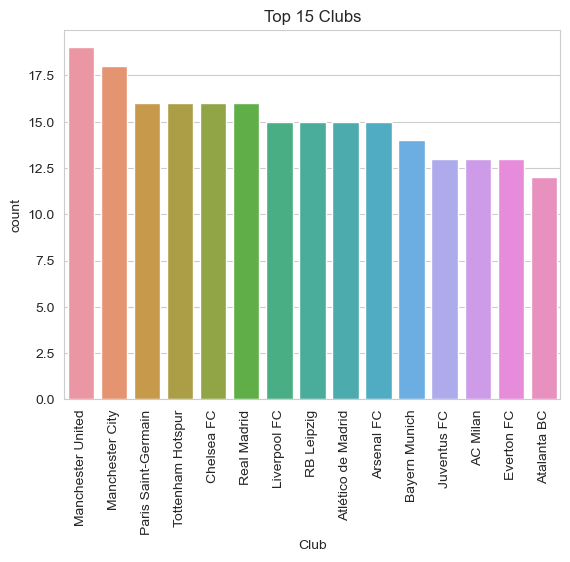

In [205]:
sns.countplot(data=players, x='Club', order=top_15_clubs.index)
plt.title('Top 15 Clubs')
plt.xticks(rotation=90)

- Manchester United (19), Manchester City (18), Paris Saint-Germain (16), Tottenham Hotspur (16), Chelsea FC (16), 
    and Real Madrid (16) represents top 6 clubs with higest representation of players.

In [206]:
# Most expensive club
most_valuable_clubs = players.groupby('Club').Market_value.sum().sort_values(ascending=False).nlargest(15)

In [207]:
players.groupby('Club').Market_value.mean().sort_values(ascending=False).nlargest(15)

Club
Manchester City        52.055556
Bayern Munich          48.785714
Paris Saint-Germain    48.250000
Inter Milan            46.625000
Liverpool FC           45.133333
Chelsea FC             44.000000
Atlético de Madrid     41.000000
FC Barcelona           40.727273
Manchester United      39.684211
Borussia Dortmund      38.363636
Real Madrid            36.875000
SSC Napoli             35.100000
Juventus FC            34.384615
Sevilla FC             33.666667
Tottenham Hotspur      33.125000
Name: Market_value, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Paris Saint-Germain'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Chelsea FC'),
  Text(4, 0, 'Bayern Munich'),
  Text(5, 0, 'Liverpool FC'),
  Text(6, 0, 'Atlético de Madrid'),
  Text(7, 0, 'Real Madrid'),
  Text(8, 0, 'Tottenham Hotspur'),
  Text(9, 0, 'FC Barcelona'),
  Text(10, 0, 'Juventus FC'),
  Text(11, 0, 'Borussia Dortmund'),
  Text(12, 0, 'Arsenal FC'),
  Text(13, 0, 'Leicester City'),
  Text(14, 0, 'RB Leipzig')])

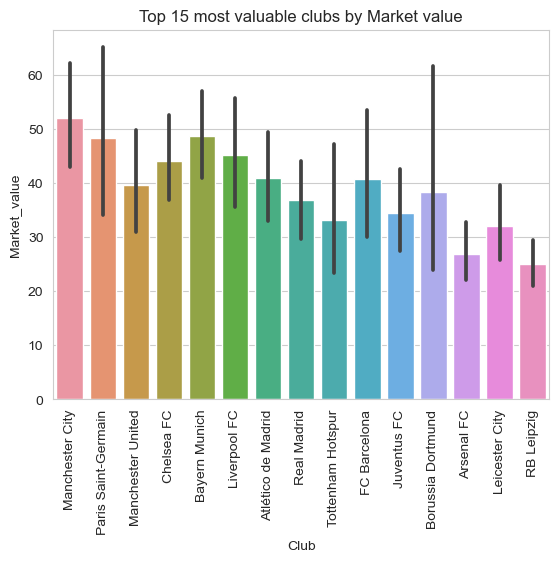

In [208]:
sns.barplot(data=players, x= 'Club', y='Market_value', order=most_valuable_clubs.index)
plt.title('Top 15 most valuable clubs by Market value')
plt.xticks(rotation=90)

#### 7. How many matches have players participated in on average?

In [209]:
# matches played

matches_played = players.groupby('Name').Matches.sum().sort_values(ascending=False).head(20)
matches_played

Name
Sofiane Diop            24
Karim Adeyemi           22
Tetê                    22
Benoît Badiashile       22
Charles De Ketelaere    21
Éverton                 20
Dodô                    20
Wendel                  20
Paul Onuachu            20
William Saliba          20
Eduardo Camavinga       20
Wissam Ben Yedder       20
Aurélien Tchouaméni     20
Rafa Silva              20
Manor Solomon           20
Sandro Tonali           20
Kevin Volland           20
Viktor Tsygankov        20
André Silva             19
Cody Gakpo              19
Name: Matches, dtype: int64

- Sofiane Diop has the higest number of matches played (24), followed by Karim Adeyemi, Tetê, and Benoît Badiashile 
    with 22 matches played eached, Charles De Ketelaere with 21 matches played.

In [210]:
mean_match_played = players.groupby('Name').Matches.mean().sort_values(ascending=False).head(20)
mean_match_played

Name
Sofiane Diop            24.0
Karim Adeyemi           22.0
Tetê                    22.0
Benoît Badiashile       22.0
Charles De Ketelaere    21.0
Éverton                 20.0
Dodô                    20.0
Wendel                  20.0
Paul Onuachu            20.0
William Saliba          20.0
Eduardo Camavinga       20.0
Wissam Ben Yedder       20.0
Aurélien Tchouaméni     20.0
Rafa Silva              20.0
Manor Solomon           20.0
Sandro Tonali           20.0
Kevin Volland           20.0
Viktor Tsygankov        20.0
André Silva             19.0
Cody Gakpo              19.0
Name: Matches, dtype: float64

#### 8. What is the distribution of goals scored by players?

Text(0.5, 1.0, 'Distribution of Goals by Players')

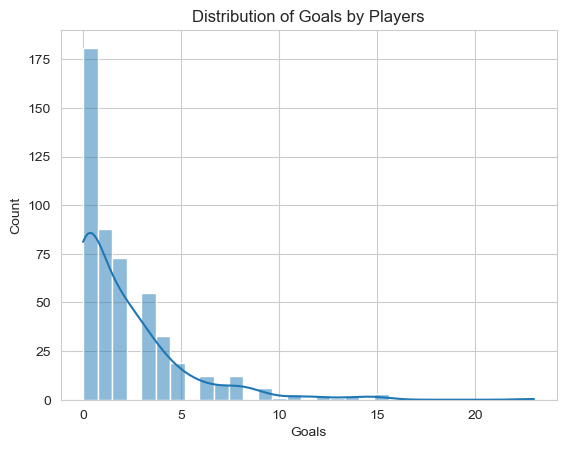

In [211]:
sns.histplot(data=players, x='Goals', kde=True)
plt.title('Distribution of Goals by Players')

#### 9. What is the distribution of assists provided by players?

<AxesSubplot:xlabel='Assists', ylabel='Count'>

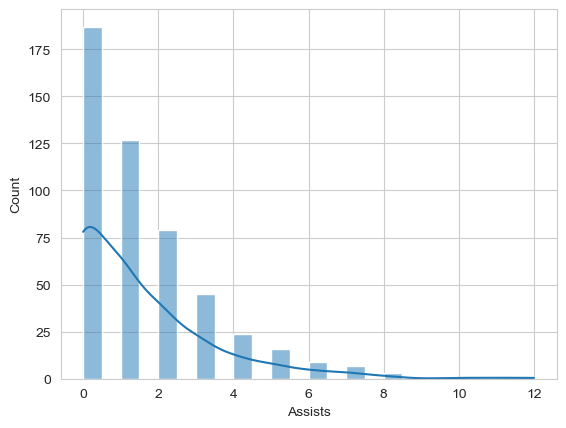

In [212]:
sns.histplot(data=players, x='Assists', kde=True)

#### 10. How many yellow and red cards have players received on average?

In [213]:
players.columns

Index(['Name', 'Position', 'Age', 'Market_value', 'Country', 'Club', 'Matches',
       'Goals', 'Own_goals', 'Assists', 'Yellow_cards', 'Second_yellow_cards',
       'Red_cards', 'Substitute_in', 'Substitute_out', 'Goals_per_game',
       'Assists_per_game'],
      dtype='object')

In [214]:
#total yellow cards

players['Total_yellow_cards'] = players.Yellow_cards + players.Second_yellow_cards
players.head()

,Name,Position,Age,Market_value,Country,Club,Matches,Goals,Own_goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Substitute_in,Substitute_out,Goals_per_game,Assists_per_game,Total_yellow_cards
0,Kylian Mbappé,Centre-Forward,22,144,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8,0.44,0.69,3
1,Erling Haaland,Centre-Forward,21,135,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1,1.30,0.40,1
2,Harry Kane,Centre-Forward,28,108,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2,0.44,0.12,2
3,Jack Grealish,Left Winger,26,90,England,Manchester City,15,2,0,3,1,0,0,2,8,0.13,0.20,1
4,Mohamed Salah,Right Winger,29,90,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3,1.00,0.40,1


In [215]:
total_yellow = players.groupby('Name').Total_yellow_cards.sum().sort_values(ascending=False).head(20)
total_yellow

Name
Moussa Diaby           7
Noa Lang               7
Cristian Romero        6
Gavi                   6
Benoît Badiashile      6
Tyler Adams            5
João Palhinha          5
Luke Shaw              5
Jordan Veretout        5
Renato Tapia           5
Pedro Porro            5
Max Aarons             5
Umar Sadiq             5
James Tarkowski        5
Nabil Fekir            5
Dayot Upamecano        5
Eduardo Camavinga      5
Gianluca Mancini       5
Kevin Volland          5
Aurélien Tchouaméni    5
Name: Total_yellow_cards, dtype: int64

In [216]:
total_yellow_avg = players.groupby('Name').Total_yellow_cards.mean().sort_values(ascending=False).nlargest(20)
total_yellow_avg

Name
Moussa Diaby           7.0
Noa Lang               7.0
Cristian Romero        6.0
Gavi                   6.0
Benoît Badiashile      6.0
Tyler Adams            5.0
João Palhinha          5.0
Luke Shaw              5.0
Jordan Veretout        5.0
Renato Tapia           5.0
Pedro Porro            5.0
Max Aarons             5.0
Umar Sadiq             5.0
James Tarkowski        5.0
Nabil Fekir            5.0
Dayot Upamecano        5.0
Eduardo Camavinga      5.0
Gianluca Mancini       5.0
Kevin Volland          5.0
Aurélien Tchouaméni    5.0
Name: Total_yellow_cards, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Moussa Diaby'),
  Text(1, 0, 'Noa Lang'),
  Text(2, 0, 'Cristian Romero'),
  Text(3, 0, 'Gavi'),
  Text(4, 0, 'Benoît Badiashile'),
  Text(5, 0, 'Tyler Adams'),
  Text(6, 0, 'João Palhinha'),
  Text(7, 0, 'Luke Shaw'),
  Text(8, 0, 'Jordan Veretout'),
  Text(9, 0, 'Renato Tapia'),
  Text(10, 0, 'Pedro Porro'),
  Text(11, 0, 'Max Aarons'),
  Text(12, 0, 'Umar Sadiq'),
  Text(13, 0, 'James Tarkowski'),
  Text(14, 0, 'Nabil Fekir'),
  Text(15, 0, 'Dayot Upamecano'),
  Text(16, 0, 'Eduardo Camavinga'),
  Text(17, 0, 'Gianluca Mancini'),
  Text(18, 0, 'Kevin Volland'),
  Text(19, 0, 'Aurélien Tchouaméni')])

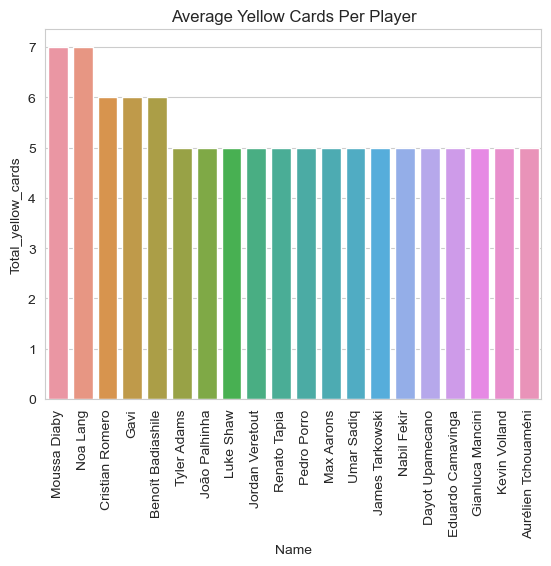

In [217]:
sns.barplot(data=players, x='Name', y='Total_yellow_cards', order=total_yellow_avg.index)
plt.title('Average Yellow Cards Per Player')
plt.xticks(rotation=90)

In [218]:
# Total red cards
total_red_cards = players.groupby('Name').Red_cards.sum().sort_values(ascending=False).head(20)
total_red_cards

Name
James Ward-Prowse    1
Maxence Lacroix      1
Victor Osimhen       1
Antoine Griezmann    1
Aymeric Laporte      1
Ayoze Pérez          1
Mario Hermoso        1
Benjamin Pavard      1
Mason Holgate        1
Sardar Azmoun        1
Kalidou Koulibaly    1
Moise Kean           1
Nabil Fekir          1
Granit Xhaka         1
Gavi                 1
Reece James          1
Paul Pogba           1
Eric García          1
Luiz Felipe          1
Ezri Konsa           1
Name: Red_cards, dtype: int64

In [219]:
mean_red_cards = players.groupby('Name').Red_cards.mean().sort_values(ascending=False).head(20)
mean_red_cards

Name
James Ward-Prowse    1.0
Maxence Lacroix      1.0
Victor Osimhen       1.0
Antoine Griezmann    1.0
Aymeric Laporte      1.0
Ayoze Pérez          1.0
Mario Hermoso        1.0
Benjamin Pavard      1.0
Mason Holgate        1.0
Sardar Azmoun        1.0
Kalidou Koulibaly    1.0
Moise Kean           1.0
Nabil Fekir          1.0
Granit Xhaka         1.0
Gavi                 1.0
Reece James          1.0
Paul Pogba           1.0
Eric García          1.0
Luiz Felipe          1.0
Ezri Konsa           1.0
Name: Red_cards, dtype: float64

#### 11. How many own goals have players scored on average?

In [220]:
players.groupby('Name').Own_goals.sum().sort_values(ascending=False).head(20)

Name
Éverton               1
Lucas Digne           1
Fikayo Tomori         1
Fred                  1
Nuno Mendes           1
Nordi Mukiele         1
Héctor Bellerín       1
Max Aarons            1
Stefan Savic          1
Eric Dier             1
Takehiro Tomiyasu     1
John Stones           1
Tomas Soucek          1
Alisson               1
Stefan de Vrij        1
Lorenzo Pellegrini    0
Nicolò Barella        0
Nicolás De La Cruz    0
Nicolas Pépé          0
Nico Elvedi           0
Name: Own_goals, dtype: int64

In [221]:
avg_own_goals = players.groupby('Name').Own_goals.mean().sort_values(ascending=False).head(20)
avg_own_goals

Name
Éverton               1.0
Lucas Digne           1.0
Fikayo Tomori         1.0
Fred                  1.0
Nuno Mendes           1.0
Nordi Mukiele         1.0
Héctor Bellerín       1.0
Max Aarons            1.0
Stefan Savic          1.0
Eric Dier             1.0
Takehiro Tomiyasu     1.0
John Stones           1.0
Tomas Soucek          1.0
Alisson               1.0
Stefan de Vrij        1.0
Lorenzo Pellegrini    0.0
Nicolò Barella        0.0
Nicolás De La Cruz    0.0
Nicolas Pépé          0.0
Nico Elvedi           0.0
Name: Own_goals, dtype: float64

- There is a maximum of 1 own goal scored by players on average

#### Thank you !